# Exploring Covid-19 Data

In [2]:
using DataFrames, DataFramesMeta, CSV, Plots, Dates, RollingFunctions, Interact

In [3]:
#url = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [4]:
df = CSV.read(download(url), DataFrame)

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [5]:
CSV.write("JohnHopkins_Cases_Country.csv", df)

"JohnHopkins_Cases_Country.csv"

In [6]:
rename!(df, 1 => "province", 2 => "country")

,province,country,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [7]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,province,,Alberta,,Zhejiang,189,"Union{Missing, String}"
2,country,,Afghanistan,,Zimbabwe,0,String
3,Lat,20.6395,-51.7963,21.8051,71.7069,1,"Union{Missing, Float64}"
4,Long,23.1656,-178.117,20.9727,178.065,1,"Union{Missing, Float64}"
5,1/22/20,2.04029,0,0.0,444,0,Int64
6,1/23/20,2.39927,0,0.0,444,0,Int64
7,1/24/20,3.44689,0,0.0,549,0,Int64
8,1/25/20,5.24908,0,0.0,761,0,Int64
9,1/26/20,7.75824,0,0.0,1058,0,Int64


In [8]:
df.country

273-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [9]:
df_spain = df[df.country .== "Spain", :]

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64
1,missing,Spain,40.4637,-3.74922,0,0,0,0,0


In [10]:
df_france = df[df.country .== "France", :]

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64
1,French Guiana,France,3.9339,-53.1258,0,0,0
2,French Polynesia,France,-17.6797,149.407,0,0,0
3,Guadeloupe,France,16.265,-61.551,0,0,0
4,Martinique,France,14.6415,-61.0242,0,0,0
5,Mayotte,France,-12.8275,45.1662,0,0,0
6,New Caledonia,France,-20.9043,165.618,0,0,0
7,Reunion,France,-21.1151,55.5364,0,0,0
8,Saint Barthelemy,France,17.9,-62.8333,0,0,0
9,Saint Pierre and Miquelon,France,46.8852,-56.3159,0,0,0


In [11]:
df_uk = df[df.country .== "United Kingdom", :]

,province,country,Lat,Long,1/22/20,1/23/20
,String?,String,Float64?,Float64?,Int64,Int64
1,Anguilla,United Kingdom,18.2206,-63.0686,0,0
2,Bermuda,United Kingdom,32.3078,-64.7505,0,0
3,British Virgin Islands,United Kingdom,18.4207,-64.64,0,0
4,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0
5,Channel Islands,United Kingdom,49.3723,-2.3644,0,0
6,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0,0
7,Gibraltar,United Kingdom,36.1408,-5.3536,0,0
8,Isle of Man,United Kingdom,54.2361,-4.5481,0,0
9,Montserrat,United Kingdom,16.7425,-62.1874,0,0


In [12]:
df_germany = df[df.country .== "Germany", :]

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64
1,missing,Germany,51.1657,10.4515,0,0,0,0,0


In [13]:
df_australia = df[(df.country .== "France") .& (df.province .=== missing), :]

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64
1,missing,France,46.2276,2.2137,0,0,2,3,3


In [14]:
df_australia = df[df.province .=== missing, :]

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64
1,missing,Afghanistan,33.9391,67.71,0,0,0
2,missing,Albania,41.1533,20.1683,0,0,0
3,missing,Algeria,28.0339,1.6596,0,0,0
4,missing,Andorra,42.5063,1.5218,0,0,0
5,missing,Angola,-11.2027,17.8739,0,0,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0,0,0
7,missing,Argentina,-38.4161,-63.6167,0,0,0
8,missing,Armenia,40.0691,45.0382,0,0,0
9,missing,Austria,47.5162,14.5501,0,0,0


In [15]:
df[1:10,:]

,province,country,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [16]:
df[1:10,:]

,province,country,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [17]:
size(df)

(273, 382)

In [18]:
names(df)

382-element Array{String,1}:
 "province"
 "country"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "1/22/21"
 "1/23/21"
 "1/24/21"
 "1/25/21"
 "1/26/21"
 "1/27/21"
 "1/28/21"
 "1/29/21"
 "1/30/21"
 "1/31/21"
 "2/1/21"
 "2/2/21"

## Interact.jl: Simple Interactive Visualizations

In [19]:
for i in 1:10
    @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10


In [20]:
@manipulate for i in 1:10
    @show i
end

i = 5


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 10,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
5, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\trodriguez\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\trodriguez\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000003b70e290, Task (runnable) @0x000000003b70e290), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12125793028419949764\",\"id\":\"53722166057

In [21]:
countries = collect(df[:, 2])

273-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [22]:
unique_countries = unique(countries)

192-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 ⋮
 "Ukraine"
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [23]:
@manipulate for i in 1:length(countries)
    countries[i]
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 273,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
137, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\trodriguez\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\trodriguez\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000003b37ce70, Task (runnable) @0x000000003b37ce70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"

## Extract Data and Plot

In [24]:
U_countries = [startswith(country, "U") for country in countries]

273-element Array{Bool,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0
 0
 0

In [25]:
df[U_countries, :]

,province,country,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,US,40.0,-100.0,1
2,missing,Uganda,1.37333,32.2903,0
3,missing,Ukraine,48.3794,31.1656,0
4,missing,United Arab Emirates,23.4241,53.8478,0
5,Anguilla,United Kingdom,18.2206,-63.0686,0
6,Bermuda,United Kingdom,32.3078,-64.7505,0
7,British Virgin Islands,United Kingdom,18.4207,-64.64,0
8,Cayman Islands,United Kingdom,19.3133,-81.2546,0
9,Channel Islands,United Kingdom,49.3723,-2.3644,0


In [26]:
U_countries .== "US" ## is Broadcasting: apply operation to each element of a vector

273-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [27]:
US_row = findfirst(countries .== "US")

250

In [28]:
US_data_row = df[US_row, :]

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64
250,missing,US,40.0,-100.0,1,1,2,2,5


In [29]:
findall(countries .== "France")

12-element Array{Int64,1}:
 119
 120
 121
 122
 123
 124
 125
 126
 127
 128
 129
 130

In [30]:
findall(countries .== "Italy")

1-element Array{Int64,1}:
 153

In [31]:
US_data = convert(Vector, US_data_row[5:end])

378-element Array{Int64,1}:
        1
        1
        2
        2
        5
        5
        5
        6
        6
        8
        8
        8
       11
        ⋮
 24846678
 25016816
 25147891
 25298986
 25445583
 25598061
 25766681
 25932794
 26074885
 26186781
 26321120
 26435557

In [32]:
names(df)

382-element Array{String,1}:
 "province"
 "country"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "1/22/21"
 "1/23/21"
 "1/24/21"
 "1/25/21"
 "1/26/21"
 "1/27/21"
 "1/28/21"
 "1/29/21"
 "1/30/21"
 "1/31/21"
 "2/1/21"
 "2/2/21"

In [33]:
date_strings = String.(names(df))[5:end]

378-element Array{String,1}:
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 "1/31/20"
 "2/1/20"
 "2/2/20"
 "2/3/20"
 ⋮
 "1/22/21"
 "1/23/21"
 "1/24/21"
 "1/25/21"
 "1/26/21"
 "1/27/21"
 "1/28/21"
 "1/29/21"
 "1/30/21"
 "1/31/21"
 "2/1/21"
 "2/2/21"

Parse: converts string representation in a Julia Object

In [34]:
format = Dates.DateFormat("m/d/Y")

dateformat"m/d/Y"

In [35]:
parse(Date, date_strings[1], format) + Year(2000)

2020-01-22

In [36]:
dates = parse.(Date, date_strings, format) .+ Year(2000)

378-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮
 2021-01-22
 2021-01-23
 2021-01-24
 2021-01-25
 2021-01-26
 2021-01-27
 2021-01-28
 2021-01-29
 2021-01-30
 2021-01-31
 2021-02-01
 2021-02-02

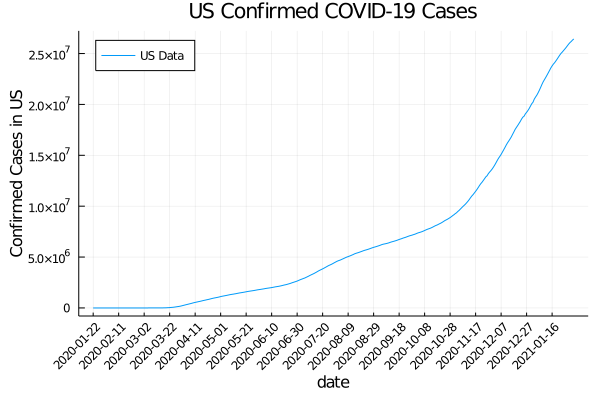

In [37]:
plot(dates, US_data, xticks=dates[1:20:end], xrotation=45, leg=:topleft, label="US Data")
xlabel!("date")
ylabel!("Confirmed Cases in US")
title!("US Confirmed COVID-19 Cases")

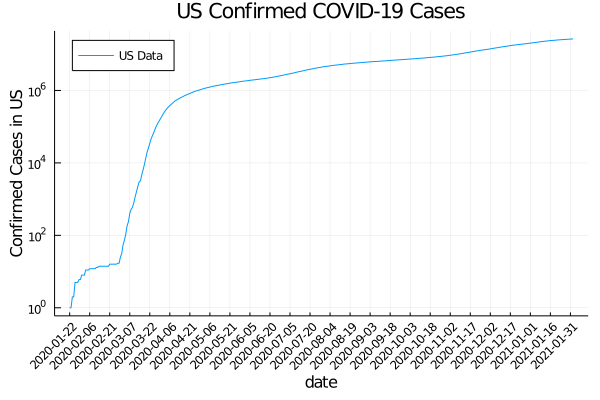

In [38]:
plot(dates, US_data, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="US Data", yscale=:log10)
xlabel!("date")
ylabel!("Confirmed Cases in US")
title!("US Confirmed COVID-19 Cases")

## Exploring Covid-19 in Europe

In [39]:
function get_data_from_country(country)
    data_row = findfirst((countries .== country) .& (df.province .=== missing))
    country_data_raw = df[data_row, :]
    country_data = convert(Vector, country_data_raw[5:end])
    replace!(country_data, 0 => 1)
    return country_data
end

get_data_from_country (generic function with 1 method)

In [40]:
Germany_data = get_data_from_country("Germany");

In [41]:
Italy_data = get_data_from_country("Italy");

In [42]:
France_data = get_data_from_country("France");

In [43]:
UK_data = get_data_from_country("United Kingdom");

In [44]:
Spain_data = get_data_from_country("Spain");

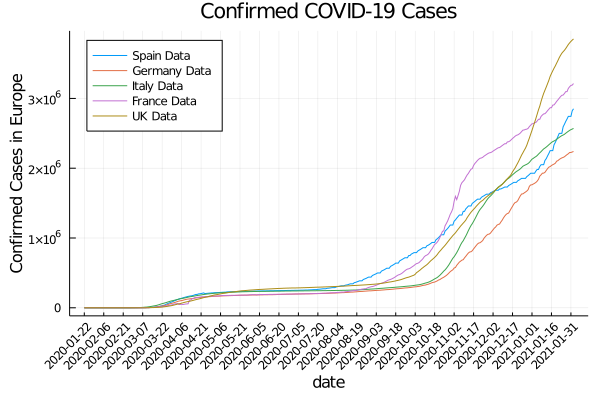

In [45]:
plot(dates, Spain_data, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Spain Data")
xlabel!("date")
ylabel!("Confirmed Cases in Europe")
title!("Confirmed COVID-19 Cases")

plot!(dates, Germany_data, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Germany Data")
plot!(dates, Italy_data, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="Italy Data")
plot!(dates, France_data, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="France Data")
plot!(dates, UK_data, xticks=dates[1:15:end], xrotation=45, leg=:topleft, label="UK Data")

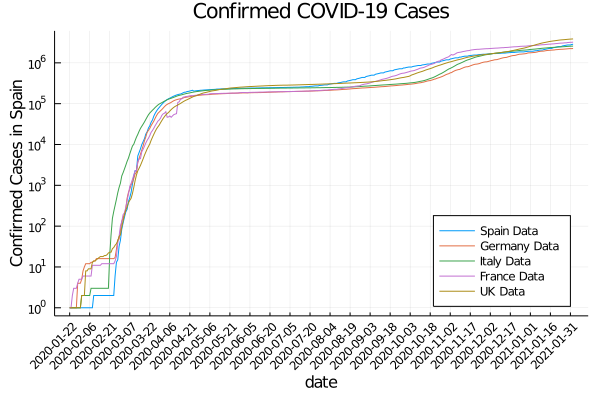

In [46]:
plot(dates, Spain_data, xticks=dates[1:15:end], xrotation=45, leg=:bottomright, label="Spain Data", yscale=:log10)
xlabel!("date")
ylabel!("Confirmed Cases in Spain")
title!("Confirmed COVID-19 Cases")

plot!(dates, Germany_data, xticks=dates[1:15:end], xrotation=45, leg=:bottomright, label="Germany Data", yscale=:log10)
plot!(dates, Italy_data, xticks=dates[1:15:end], xrotation=45, leg=:bottomright, label="Italy Data", yscale=:log10)
plot!(dates, France_data, xticks=dates[1:15:end], xrotation=45, leg=:bottomright, label="France Data", yscale=:log10)
plot!(dates, UK_data, xticks=dates[1:15:end], xrotation=45, leg=:bottomright, label="UK Data", yscale=:log10)

In [47]:
fin = "1/29/21"
inicio = "1/28/21";

In [48]:
df_spain.:($fin) - df_spain.:($inicio)

1-element Array{Int64,1}:
 38118

In [49]:
df_germany.:($fin) - df_germany.:($inicio)

1-element Array{Int64,1}:
 12831

In [50]:
df_uk = df[df.country .== "United Kingdom", :]
df_uk.:($fin) - df_uk.:($inicio)

11-element Array{Int64,1}:
     0
     0
     0
     2
     0
     0
    14
     2
     0
    48
 29079

In [51]:
df_france = df[df.country .== "France", :]
df_france.:($fin) - df_france.:($inicio)

12-element Array{Int64,1}:
    75
    27
     0
     0
   347
     3
     0
     0
     0
     0
     0
 46043

In [52]:
df_italy = df[df.country .== "Italy", :]
df_italy.:($fin) - df_italy.:($inicio) 

1-element Array{Int64,1}:
 13563

In [53]:
df_us = df[df.country .== "US", :]
df_us.:($fin) - df_us.:($inicio)

1-element Array{Int64,1}:
 166113

## Serie Corta

In [54]:
n = 90

90

In [55]:
dates_month = [dates[i] for i in collect(length(dates)-n:length(dates))]
Spain_month = [Spain_data[i] for i in collect(length(Spain_data)-n:length(Spain_data))]
Italy_month = [Italy_data[i] for i in collect(length(Italy_data)-n:length(Italy_data))]
France_month = [France_data[i] for i in collect(length(France_data)-n:length(France_data))]
UK_month = [UK_data[i] for i in collect(length(UK_data)-n:length(UK_data))]
Germany_month = [Germany_data[i] for i in collect(length(Germany_data)-n:length(Germany_data))];

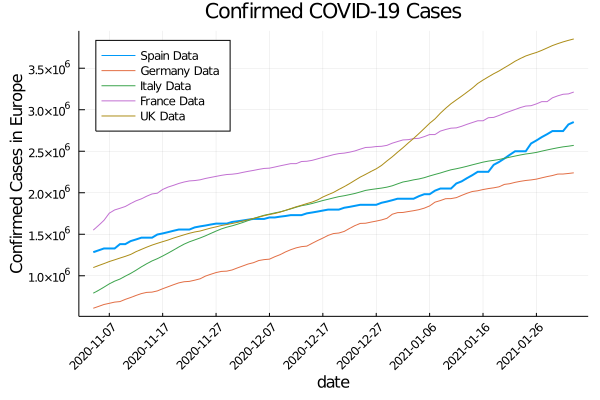

In [56]:
plot(dates_month, Spain_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain Data", lw=2)
xlabel!("date")
ylabel!("Confirmed Cases in Europe")
title!("Confirmed COVID-19 Cases")

plot!(dates_month, Germany_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Germany Data")
plot!(dates_month, Italy_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Italy Data")
plot!(dates_month, France_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="France Data")
plot!(dates_month, UK_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK Data")

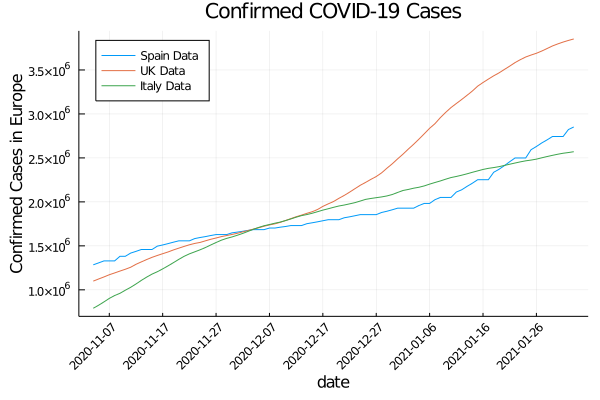

In [57]:
plot(dates_month, Spain_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain Data")
xlabel!("date")
ylabel!("Confirmed Cases in Europe")
title!("Confirmed COVID-19 Cases")

plot!(dates_month, UK_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK Data")
plot!(dates_month, Italy_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Italy Data")


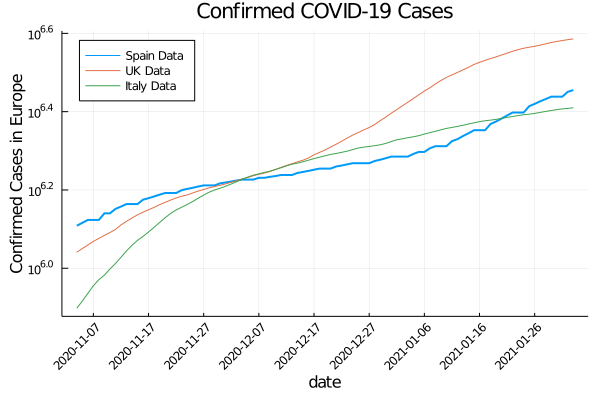

In [58]:
plot(dates_month, Spain_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain Data", yscale=:log10, lw=2)
xlabel!("date")
ylabel!("Confirmed Cases in Europe")
title!("Confirmed COVID-19 Cases")

plot!(dates_month, UK_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK Data", yscale=:log10)
plot!(dates_month, Italy_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Italy Data", yscale=:log10)

## Casos Diarios

In [59]:
n = 160

160

In [60]:
dates_month = [dates[i] for i in collect(length(dates)-n:length(dates))]

Spain_slice1 = [Spain_data[i] for i in collect(length(Spain_data)-n:length(Spain_data))]
Spain_slice2 = [Spain_data[i] for i in collect(length(Spain_data)-n-1:length(Spain_data)-1)]
Spain_month = Spain_slice1 - Spain_slice2;

UK_slice1 = [UK_data[i] for i in collect(length(UK_data)-n:length(UK_data))]
UK_slice2 = [UK_data[i] for i in collect(length(UK_data)-n-1:length(UK_data)-1)]
UK_month = UK_slice1 - UK_slice2;


Italy_slice1 = [Italy_data[i] for i in collect(length(Italy_data)-n:length(Italy_data))]
Italy_slice2 = [Italy_data[i] for i in collect(length(Italy_data)-n-1:length(Italy_data)-1)]
Italy_month = Italy_slice1 - Italy_slice2;

France_slice1 = [France_data[i] for i in collect(length(France_data)-n:length(France_data))]
France_slice2 = [France_data[i] for i in collect(length(France_data)-n-1:length(France_data)-1)]
France_month = France_slice1 - France_slice2;

Germany_slice1 = [Germany_data[i] for i in collect(length(Germany_data)-n:length(Germany_data))]
Germany_slice2 = [Germany_data[i] for i in collect(length(Germany_data)-n-1:length(Germany_data)-1)]
Germany_month = Germany_slice1 - Germany_slice2;


## Rolling Windows

In [61]:
runmean([2,4,8], 3)

3-element Array{Float64,1}:
 2.0
 3.0
 4.666666666666667

In [62]:
siete = 7
catorce = 14

14

In [63]:
Spain_7 = runmean(Spain_month, siete);
Spain_14 = runmean(Spain_month, catorce);

Italy_7 = runmean(Italy_month, siete);
Italy_14 = runmean(Italy_month, catorce);

UK_7 = runmean(UK_month, siete);
UK_14 = runmean(UK_month, catorce);

France_7 = runmean(France_month, siete);
France_14 = runmean(France_month, catorce);

Germany_7 = runmean(Germany_month, siete);
Germany_14 = runmean(Germany_month, catorce);

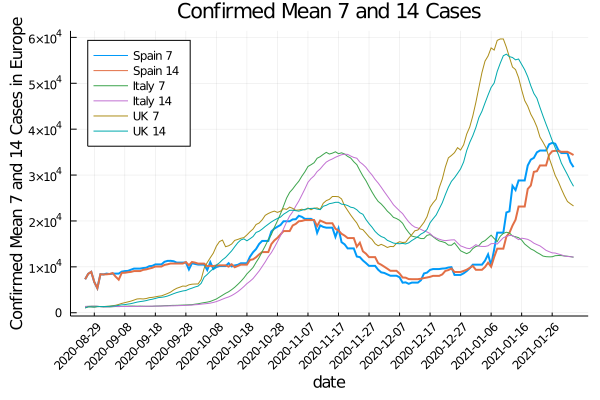

In [64]:
plot(dates_month, Spain_7, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain 7", lw=2)
xlabel!("date")
ylabel!("Confirmed Mean 7 and 14 Cases in Europe")
title!("Confirmed Mean 7 and 14 Cases")
plot!(dates_month, Spain_14, xticks=dates[1:1:end], xrotation=45, leg=:topleft, label="Spain 14", lw=2)

plot!(dates_month, Italy_7, xticks=dates[1:1:end], xrotation=45, leg=:topleft, label="Italy 7")
plot!(dates_month, Italy_14, xticks=dates[1:1:end], xrotation=45, leg=:topleft, label="Italy 14")

plot!(dates_month, UK_7, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK 7")
plot!(dates_month, UK_14, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK 14")

## Adding Population

In [65]:
#population = "../COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"
population = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv"

In [66]:
df_population = CSV.read(download(population), DataFrame);

In [67]:
CSV.write("JohnHopkins_Population_Country.csv", df)

"JohnHopkins_Population_Country.csv"

In [68]:
rename!(df_population, 7 => "province", 8 => "country");

In [69]:
describe(df_population)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,UID,6.80296e7,4,8.4023e7,84099999
2,iso2,,AD,,ZW
3,iso3,,ABW,,ZWE
4,code3,761.062,4,840.0,894
5,FIPS,32553.8,1,30074.0,99999
6,Admin2,,Abbeville,,Ziebach
7,province,,Abia,,Zuid-Holland
8,country,,Afghanistan,,Zimbabwe
9,Lat,35.7407,-52.368,37.939,71.7069


In [70]:
df_population_Spain = df_population[(df_population.country .== "Spain") .& (ismissing.(df_population.province)), :]
df_population_UK = df_population[(df_population.country .== "United Kingdom").& (ismissing.(df_population.province)) , :]
df_population_Italy = df_population[(df_population.country .== "Italy").& (ismissing.(df_population.province)) , :]
df_population_France = df_population[(df_population.country .== "France").& (ismissing.(df_population.province)) , :]
df_population_Germany = df_population[(df_population.country .== "Germany").& (ismissing.(df_population.province)) , :];

In [71]:
df_population_Spain.Population

1-element Array{Union{Missing, Int64},1}:
 46754783

In [72]:
Spain_7_100 = (Spain_7 ./ df_population_Spain.Population) .* 100000
UK_7_100 = (UK_7 ./ df_population_UK.Population) .* 100000
France_7_100 = (France_7 ./ df_population_France.Population) .* 100000
Italy_7_100 = (Italy_7 ./ df_population_Italy.Population) .* 100000
Germany_7_100 = (Germany_7 ./ df_population_Germany.Population) .* 100000;

Spain_14_100 = (Spain_14 ./ df_population_Spain.Population) .* 100000
UK_14_100 = (UK_14 ./ df_population_UK.Population) .* 100000
France_14_100 = (France_14 ./ df_population_France.Population) .* 100000
Italy_14_100 = (Italy_14 ./ df_population_Italy.Population) .* 100000
Germany_14_100 = (Germany_14 ./ df_population_Germany.Population) .* 100000;

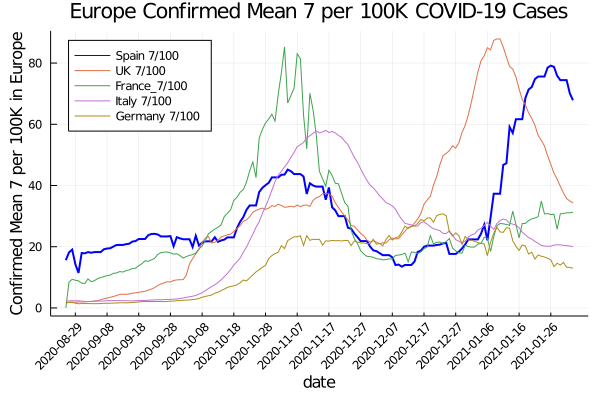

In [73]:
plot(dates_month, Spain_7_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain 7/100", lw=2, c="blue")
xlabel!("date")
ylabel!("Confirmed Mean 7 per 100K in Europe")
title!("Europe Confirmed Mean 7 per 100K COVID-19 Cases")

plot!(dates_month, UK_7_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK 7/100")
plot!(dates_month, France_7_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="France_7/100")
plot!(dates_month, Italy_7_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Italy 7/100")
plot!(dates_month, Germany_7_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Germany 7/100")

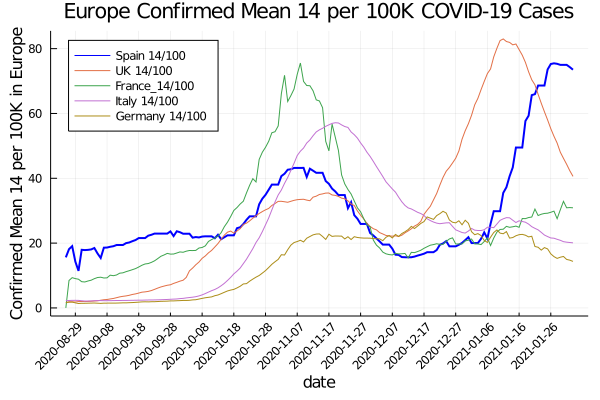

In [74]:
plot(dates_month, Spain_14_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain 14/100", lw=2, c="blue")
xlabel!("date")
ylabel!("Confirmed Mean 14 per 100K in Europe")
title!("Europe Confirmed Mean 14 per 100K COVID-19 Cases")

plot!(dates_month, UK_14_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK 14/100")
plot!(dates_month, France_14_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="France_14/100")
plot!(dates_month, Italy_14_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Italy 14/100")
plot!(dates_month, Germany_14_100, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Germany 14/100")

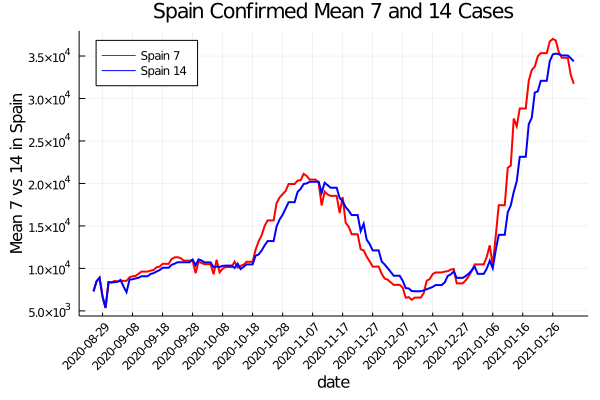

In [75]:
plot(dates_month, Spain_7, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain 7", lw=2, c="red")
xlabel!("date")
ylabel!("Mean 7 vs 14 in Spain")
title!("Spain Confirmed Mean 7 and 14 Cases")

#plot!(dates_month, Spain_month, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain Data")
plot!(dates_month, Spain_14, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain 14", lw = 2, c="blue")

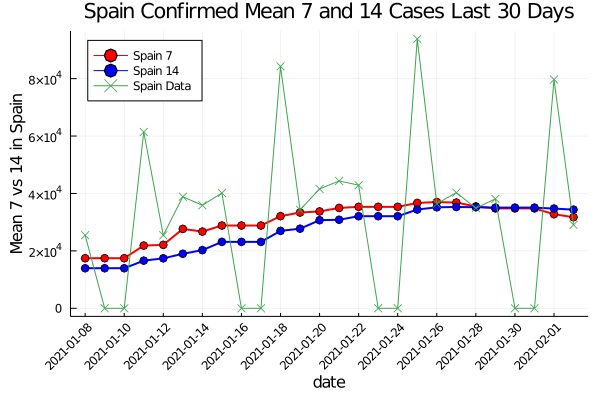

In [76]:
n = 25
plot(dates_month[end-n:end], Spain_7[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 7", m=:o, lw=2, c="red")
xlabel!("date")
ylabel!("Mean 7 vs 14 in Spain")
title!("Spain Confirmed Mean 7 and 14 Cases Last 30 Days")

plot!(dates_month[end-n:end], Spain_14[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 14", m=:o, lw = 2, c="blue")
plot!(dates_month[end-n:end], Spain_month[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain Data", m=:x)
#plot!(dates_month[end-n:end], UK_month[end-n:end], xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK Data")
#plot!(dates_month[end-n:end], UK_14[end-n:end], xticks=dates[1:10:end], xrotation=45, leg=:topleft, m=:o, label="UK 14")
#plot!(dates_month[end-n:end], UK_7[end-n:end], xticks=dates[1:10:end], xrotation=45, leg=:topleft, m=:o, label="UK 7")



In [77]:
n = 20
@manipulate for n in slider(20:150, value=1)
    plot(dates_month[end-n:end], Spain_7[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 7", m=:o, lw=2, c="red")
    xlabel!("date")
    ylabel!("Mean 7 vs 14 in Spain")
    title!("Spain Confirmed Mean 7 and 14 Cases Last 30 Days")

    plot!(dates_month[end-n:end], Spain_14[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 14", m=:o, lw = 2, c="blue")

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 150,:min => 20,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\trodriguez\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\trodriguez\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\trodriguez\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001546d710, Task (runnable) @0x000000001546d710), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42

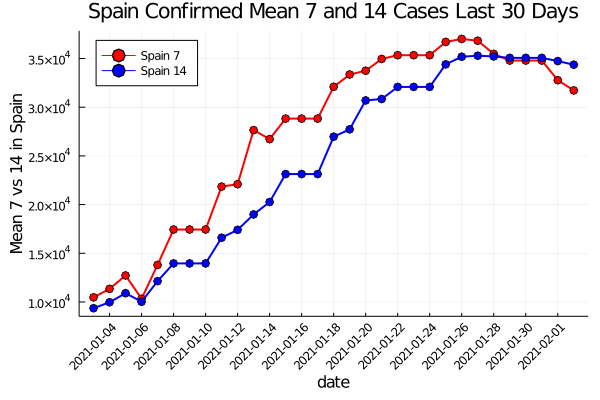

In [78]:
n = 30
plot(dates_month[end-n:end], Spain_7[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 7", m=:o, lw=2, c="red")
xlabel!("date")
ylabel!("Mean 7 vs 14 in Spain")
title!("Spain Confirmed Mean 7 and 14 Cases Last 30 Days")

plot!(dates_month[end-n:end], Spain_14[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 14", m=:o, lw = 2, c="blue")


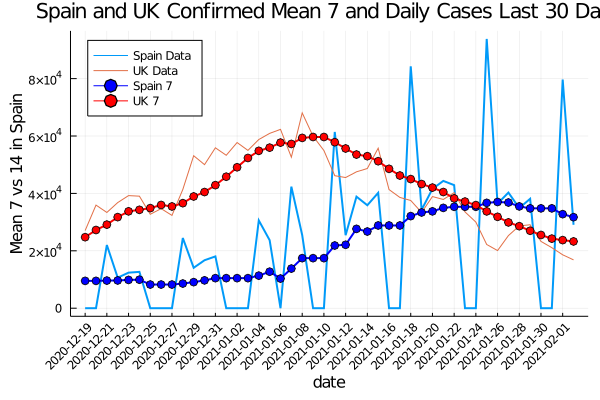

In [79]:
n = 45

plot(dates_month[end-n:end], Spain_month[end-n:end], xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain Data", lw=2)
xlabel!("date")
ylabel!("Mean 7 vs 14 in Spain")
title!("Spain and UK Confirmed Mean 7 and Daily Cases Last 30 Days")

plot!(dates_month[end-n:end], UK_month[end-n:end], xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK Data")
plot!(dates_month[end-n:end], Spain_7[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="Spain 7", m=:o, lw=2, c="blue")
plot!(dates_month[end-n:end], UK_7[end-n:end], xticks=dates[1:2:end], xrotation=45, leg=:topleft, label="UK 7", m=:o, lw=2, c="red")
    

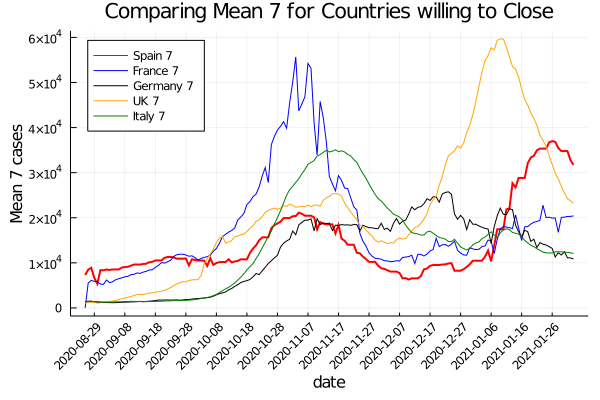

In [80]:
plot(dates_month, Spain_7, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Spain 7", lw=2, c="red")
xlabel!("date")
ylabel!("Mean 7 cases")
title!("Comparing Mean 7 for Countries willing to Close")

plot!(dates_month, France_7, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="France 7", c="blue")
plot!(dates_month, Germany_7, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Germany 7", c="black")
plot!(dates_month, UK_7, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="UK 7", c="orange")
plot!(dates_month, Italy_7, xticks=dates[1:10:end], xrotation=45, leg=:topleft, label="Italy 7", c="green")